In [1]:
#import library
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8)

In [2]:
#Read in the data
df=pd.read_csv(r'C:\Users\Yasod\Downloads\archive (4)\movies.csv')

In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [5]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
df['budget']=df['budget'].astype('Int64')
df['gross']=df['gross'].astype('Int64')

In [7]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        Int64
gross         Int64
company      object
runtime     float64
dtype: object

In [8]:

df['released_date'] = df.released.str.split(' ', expand = True)[0]
df['released_year'] = df.released.str.split(' ', expand = True)[2]
#df.head()


In [9]:
df.drop("released_date", axis=1, inplace=True)

In [12]:
#df.head()

In [13]:
df['year'].equals(df['released_year'])

False

In [14]:
df=df.sort_values(by=['gross'], inplace=False, ascending=False)

In [58]:
#get all the data
pd.set_option('display.max_rows', None)

In [15]:
#df.head()

In [16]:
#drop duplicates
df['company'].drop_duplicates()

5445    Twentieth Century Fox
7445           Marvel Studios
6663                Lucasfilm
7480     Walt Disney Pictures
6653       Universal Pictures
                ...          
7658             Notis Studio
7660      Abominable Pictures
7661           Dow Jazz Films
7665         Embi Productions
7667              PK 65 Films
Name: company, Length: 2386, dtype: object

In [17]:

df['gross']=df["gross"].fillna(0) 
df['budget']=df["budget"].fillna(0) 

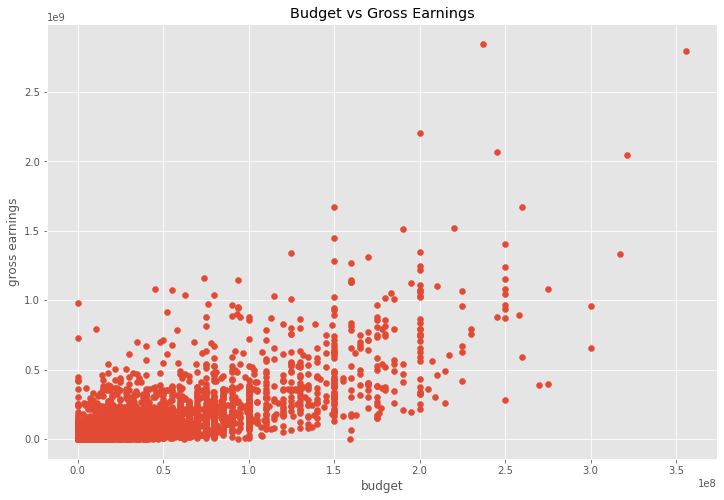

In [18]:
#budget vs gross
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('budget')
plt.ylabel('gross earnings')
plt.show()


In [20]:
df['budget']=df['budget'].astype('float')
df['gross']=df['gross'].astype('float')

<AxesSubplot:xlabel='budget', ylabel='gross'>

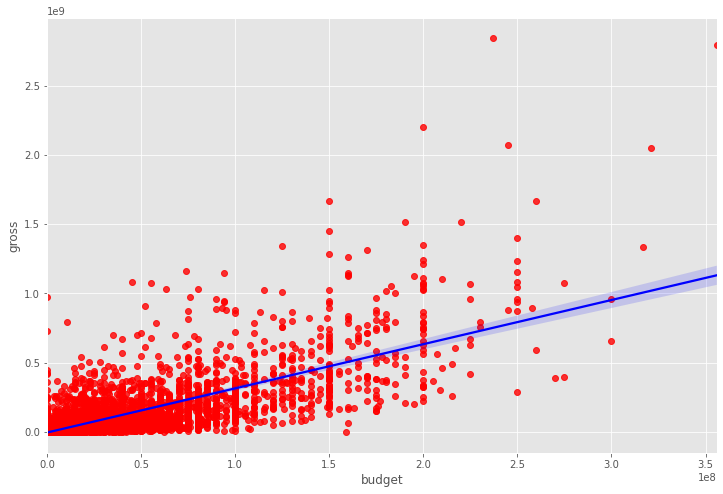

In [21]:
#plot using seaborn
sns.regplot(x='budget', y='gross', data=df,scatter_kws={"color": "red"}, line_kws={"color": "blue"})

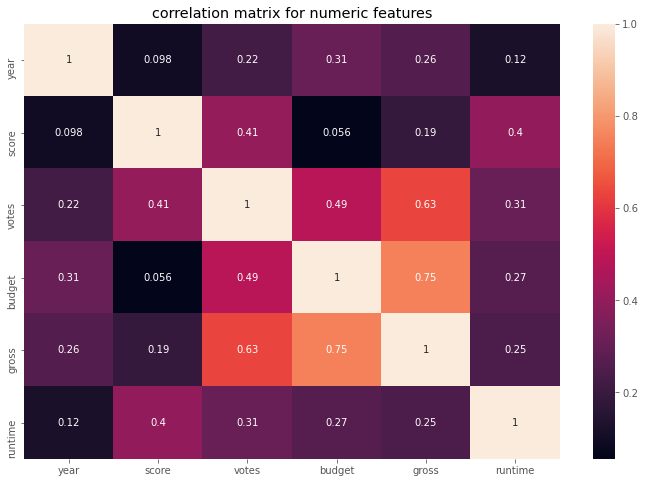

In [81]:
#heatmap
correlation_matrix=df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('correlation matrix for numeric features')
plt.show()

In [77]:
df.corr(method='pearson')#pearson, kendall, spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.309212,0.261900,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.222945,0.409182,1.000000,0.486862,0.632834,0.309212
budget,0.309212,0.055665,0.486862,1.000000,0.750157,0.269510
gross,0.261900,0.186392,0.632834,0.750157,1.000000,0.245235
runtime,0.120811,0.399451,0.309212,0.269510,0.245235,1.000000


In [22]:
#changing some columnsinto numeric for correlation
df_numerized=df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype=='object'):
        df_numerized[col_name]=df_numerized[col_name].astype('category')
        df_numerized[col_name]=df_numerized[col_name].cat.codes #cat.codes gives random number
        


In [23]:
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000.0,2.847246e+09,2253,162.0,31
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000.0,2.797501e+09,1606,181.0,41
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000.0,2.201647e+09,2253,194.0,19
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000.0,2.069522e+09,1540,138.0,37
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000.0,2.048360e+09,1606,149.0,40


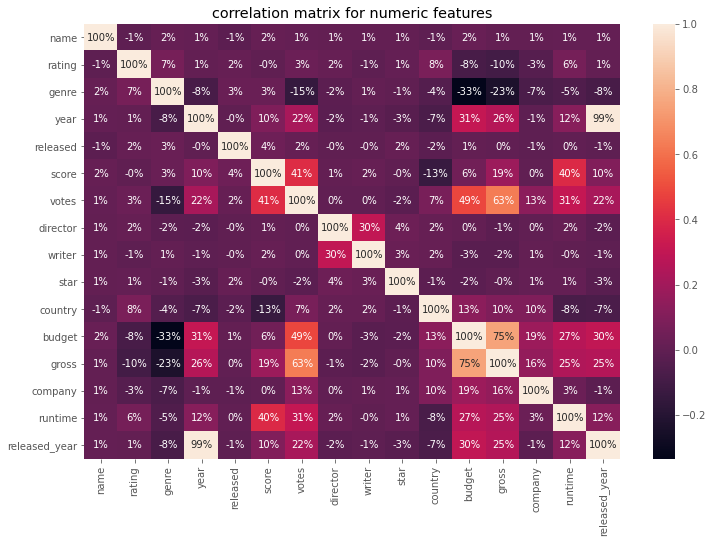

In [24]:
correlation_matrix=df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True, fmt='.0%')
plt.title('correlation matrix for numeric features')
plt.show()

In [25]:

correlation_mat = df_numerized.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()


In [26]:
print(corr_pairs)

name           name             1.000000
               rating           0.344944
               genre            0.138277
               year             0.253700
               released         0.656451
                                  ...   
released_year  budget           0.058963
               gross            0.269681
               company          0.126665
               runtime          0.026269
               released_year    1.000000
Length: 256, dtype: float64


In [27]:

sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

score          country         -0.095523
country        score           -0.095523
genre          country         -0.072423
country        genre           -0.072423
score          rating          -0.069097
                                  ...   
year           year             1.000000
genre          genre            1.000000
rating         rating           1.000000
runtime        runtime          1.000000
released_year  released_year    1.000000
Length: 256, dtype: float64


In [118]:

# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

released       director         0.502084
director       released         0.502084
writer         votes            0.521323
votes          writer           0.521323
writer         released         0.546858
released       writer           0.546858
company        star             0.573670
star           company          0.573670
               director         0.581049
director       star             0.581049
writer         star             0.590607
star           writer           0.590607
name           votes            0.595709
votes          name             0.595709
gross          votes            0.611780
votes          gross            0.611780
company        director         0.616906
director       company          0.616906
company        writer           0.618775
writer         company          0.618775
star           name             0.653260
name           star             0.653260
               released         0.656262
released       name             0.656262
               g